In [17]:
# Section 1: Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [18]:
# Section 2: Loading and Preprocessing the Data
# Load the dataset
ipl_data = pd.read_csv('matches.csv')

# Encode categorical columns
encode_columns = ['Team_1', 'Team_2', 'Venue', 'Toss_Winner', 'Toss_Decision', 'Winner']
label_encoders = {}

for col in encode_columns:
    label_encoders[col] = LabelEncoder()
    ipl_data[col] = label_encoders[col].fit_transform(ipl_data[col])

ipl_data.head()  # Display the first few rows of the dataset


,Match_ID,Date,Team_1,Team_2,Venue,Toss_Winner,Toss_Decision,Team_1_Score,Team_2_Score,Team_1_Wickets,Team_2_Wickets,Winner,Man_of_the_Match
0,1,2024-04-02,1,0,7,0,1,207,206,7,9,1,DC
1,2,2024-04-03,4,0,6,4,1,164,131,6,9,4,PBKS
2,3,2024-04-04,7,5,2,7,0,122,201,9,10,5,RCB
3,4,2024-04-05,0,6,4,0,1,151,164,8,9,6,CSK
4,5,2024-04-06,4,1,7,1,0,130,212,10,7,1,PBKS


In [19]:
# Section 3: Feature Selection and Target Variable
# Select features (input variables) and target (output variable)
X = ipl_data[['Team_1', 'Team_2', 'Venue', 'Toss_Winner', 'Toss_Decision']]
y = ipl_data['Winner']

X.head(), y.head()  # Display the features and the target


(   Team_1  Team_2  Venue  Toss_Winner  Toss_Decision
 0       1       0      7            0              1
 1       4       0      6            4              1
 2       7       5      2            7              0
 3       0       6      4            0              1
 4       4       1      7            1              0,
 0    1
 1    4
 2    5
 3    6
 4    1
 Name: Winner, dtype: int64)

In [20]:
# Section 4: Train-Test Split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((44, 5), (12, 5), (44,), (12,))

In [21]:
# Section 5: Model Training
# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Section 6: Making Predictions
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predictions and actual results back to team names
y_pred_teams = label_encoders['Winner'].inverse_transform(y_pred)
y_test_teams = label_encoders['Winner'].inverse_transform(y_test)

# Create a DataFrame to compare actual and predicted winners
comparison_df = pd.DataFrame({'Actual Winner': y_test_teams, 'Predicted Winner': y_pred_teams})

# Display the comparison
comparison_df.head()


,Actual Winner,Predicted Winner
0,DC,DC
1,KKR,KKR
2,KKR,DC
3,RCB,PBKS
4,PBKS,DC


In [23]:
# Section 7: Model Accuracy
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 41.67%


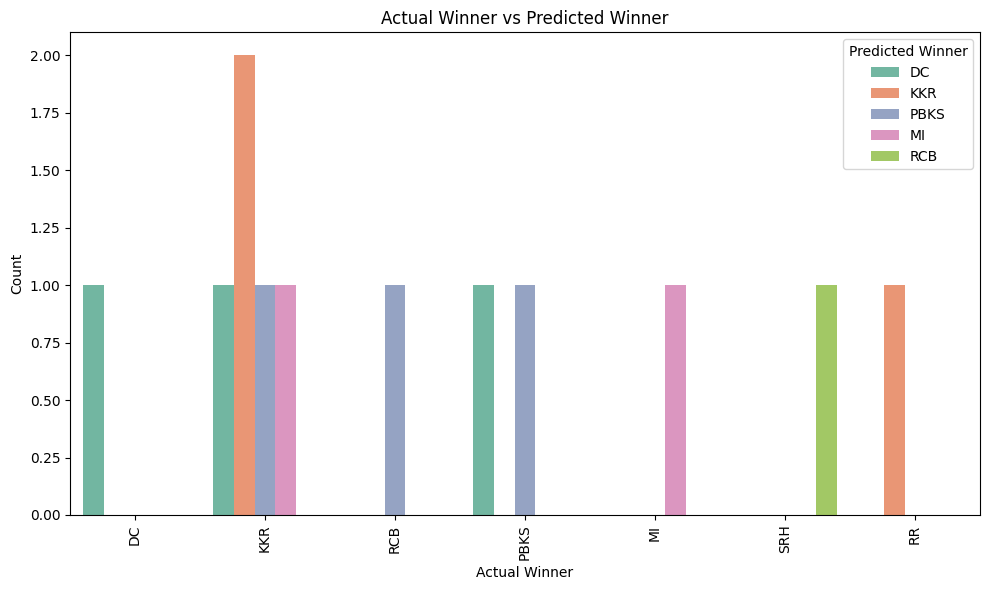

In [24]:
# Section 8: Visualization - Actual Winner vs Predicted Winner
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual Winner', hue='Predicted Winner', data=comparison_df, palette='Set2')
plt.title('Actual Winner vs Predicted Winner')
plt.xlabel('Actual Winner')
plt.ylabel('Count')
plt.legend(title='Predicted Winner', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/var/folders/k8/gy7z8ryj4s1dkjbdkb_n6_zc0000gn/T/ipykernel_88885/2779478035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Correct Prediction', data=comparison_df, palette='coolwarm')


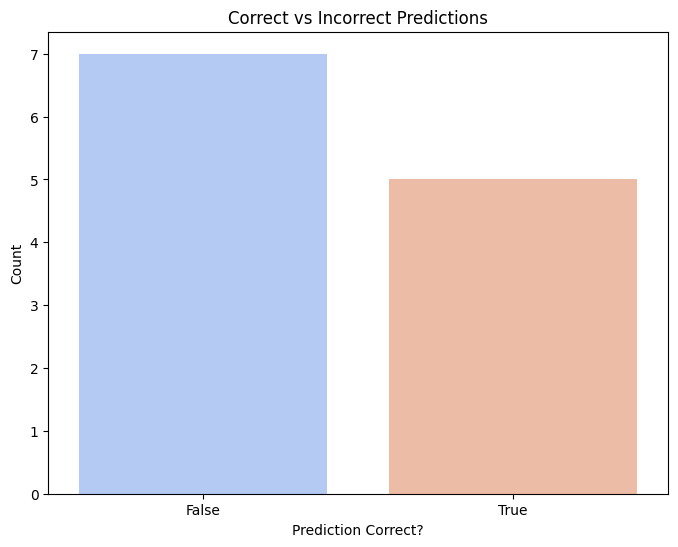

In [25]:
# Section 9: Visualization - Correct vs Incorrect Predictions
comparison_df['Correct Prediction'] = comparison_df['Actual Winner'] == comparison_df['Predicted Winner']

plt.figure(figsize=(8, 6))
sns.countplot(x='Correct Prediction', data=comparison_df, palette='coolwarm')
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Prediction Correct?')
plt.ylabel('Count')
plt.show()


In [26]:
# Section 10: Predicting a Future Match
new_match = pd.DataFrame({
    'Team_1': [label_encoders['Team_1'].transform(['MI'])[0]],  # MI
    'Team_2': [label_encoders['Team_2'].transform(['CSK'])[0]],  # CSK
    'Venue': [label_encoders['Venue'].transform(['Wankhede Stadium'])[0]],  # Wankhede Stadium
    'Toss_Winner': [label_encoders['Toss_Winner'].transform(['MI'])[0]],  # MI won the toss
    'Toss_Decision': [label_encoders['Toss_Decision'].transform(['Bat'])[0]]  # MI chose to bat
})

# Predict the winner for the new match
predicted_winner = model.predict(new_match)
predicted_winner_team = label_encoders['Winner'].inverse_transform(predicted_winner)

print(f"The predicted winner for the new match is: {predicted_winner_team[0]}")


The predicted winner for the new match is: DC
